In [1]:
#EDA, CLEANING & PROCESSING:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm
from imblearn.under_sampling import RandomUnderSampler

#ML:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [82]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [83]:
## Column 'id' is dropped because its existence does not make much difference in model building

df.drop(columns="id",inplace=True)

##Drop rows containing 'Other' in the 'gender' column
df[df['gender'] != 'Other']

# Calculate the median BMI of the overall dataset
overall_median_bmi = df['bmi'].median()

# Define a function to fill NaN values in 'bmi' using the overall median
def fill_bmi(row):
    if pd.isnull(row['bmi']):
        return overall_median_bmi
    else:
        return row['bmi']

# Apply the function to fill NaN values in the 'bmi' column
df['bmi'] = df.apply(fill_bmi, axis=1)
overall_median_bmi

28.1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Dataset balancing

In [84]:
from imblearn.under_sampling import RandomUnderSampler

# define the target variable (dependent variable) as y
y = df['stroke']

# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if c != 'stroke']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

# Assuming X and y are the feature and target arrays
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Assuming X_resampled and y_resampled are the resampled feature and target arrays
stroke_undersample = pd.DataFrame(X_resampled, columns=predictor_columns)
stroke_undersample['stroke'] = y_resampled

# Save the under-sampled DataFrame as a CSV file
stroke_undersample.to_csv('stroke_undersampleb4encode.csv', index=False)

# Features transformation (label encoding)

In [85]:
df = pd.read_csv('stroke_undersampleb4encode.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
1,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
3,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
493,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
494,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
495,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
496,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.1,Unknown,1


In [58]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Female    285
Male      213
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Converting categorical to numerical via Label encoding
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Save the under-sampled DataFrame as a CSV file
df.to_csv('stroke_leundersamplebAFencode.csv', index=False)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,44.0,0,0,1,2,1,80.75,30.9,2,0
1,0,75.0,1,0,1,3,0,219.82,29.5,1,0
2,0,56.0,0,0,1,2,1,94.19,25.7,2,0
3,0,5.0,0,0,0,4,1,122.25,16.7,0,0
4,0,69.0,0,0,1,3,0,110.96,25.9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
493,1,57.0,0,0,1,2,0,84.96,36.7,0,1
494,0,14.0,0,0,0,4,0,57.93,30.9,0,1
495,0,75.0,0,0,1,3,0,78.80,29.3,1,1
496,1,71.0,1,0,1,3,0,87.80,28.1,0,1


# Machine Learning Model Training

In [2]:
df = pd.read_csv('stroke_leundersamplebAFencode.csv')

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# define the target variable (dependent variable) as y
y = df['stroke']

# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if c != 'stroke']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

#create training and testing subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Build Model
model = LogisticRegression (random_state = 1, max_iter = 1000)

# Fit Model
model.fit(X_train , y_train)
#model.fit(X_train_scaled , y_train)
#model.fit(X_train_scaled , y_train.ravel())

# Score
model.score(X_test, y_test)
print ('Accuracy score :', model.score(X_test, y_test))

# Predict class labels (not probabilities)
lr_y_pred = model.predict(X_test)

# Calculate and print the confusion matrix
print('Logistic Regression')
print('Model Confusion Matrix (Logistic Regression)')
print(confusion_matrix(y_test, lr_y_pred))

# Print the classification report
print('Model Classification Report (Logistic Regression)')
print(classification_report(y_test, lr_y_pred))

Accuracy score : 0.77
Logistic Regression
Model Confusion Matrix (Logistic Regression)
[[34 11]
 [12 43]]
Model Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        45
           1       0.80      0.78      0.79        55

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [4]:
##Regularisation & Scaling to fine-tune model
from sklearn.model_selection import train_test_split, GridSearchCV
#without scaling -pop up issue, i.e. lbfgs solver used by LogisticRegression failed to converge within the specified number of iterations.
#changing solver from lbfgs to liblinear - supports both 'l1' and 'l2' penalties & carry out features Scaling

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

# Create a GridSearchCV instance with logistic regression and parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=lr_params, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Score: 0.7487974683544304


In [5]:
#Use Support Vector Machine to evaluate model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma = 'auto'))
clf.fit(X_train, y_train)

print('Support Vector Machine')
print('Accuracy:', clf.score(X_test, y_test))
svm_y_pred = clf.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(SVM)')
print(confusion_matrix(y_test, svm_y_pred))

print('Model Classification Report(SVM)')
print(classification_report(y_test, svm_y_pred))

Support Vector Machine
Accuracy: 0.8
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(SVM)
[[35 10]
 [10 45]]
Model Classification Report(SVM)
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        45
           1       0.82      0.82      0.82        55

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [6]:
#Find best estimator for SVM

from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability=True))]

svc_params = {
    'SVM__C': [1, 10, 100],
    'SVM__gamma': [0.001, 0.0001],
    'SVM__kernel': ['linear', 'rbf']
}

svc_pipeline = Pipeline(steps)
SVCclf = GridSearchCV(svc_pipeline, svc_params)
SVCclf.fit(X, y)

# Get the best estimator and its corresponding score
best_estimator = SVCclf.best_estimator_
best_score = SVCclf.best_score_

print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=10, gamma=0.001, probability=True))])
Best Score: 0.7611111111111112


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Put in best_estimator from previous code
best_model = best_estimator

print('Support Vector Machine_test')

# Calculate and print the accuracy score
accuracy = best_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions on the testing data
svm_y_pred = best_model.predict(X_test)

# Calculate and print the default confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

# Calculate and print the model's confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_pred)
print('Model Confusion Matrix (SVM_C)')
print(conf_matrix)

# Print the model's classification report
print('Model Classification Report (SVM_C)')
print(classification_report(y_test, svm_y_pred))

Support Vector Machine_test
Accuracy: 0.78
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix (SVM_C)
[[33 12]
 [10 45]]
Model Classification Report (SVM_C)
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.79      0.82      0.80        55

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [15]:
#Use Baive Bayes to evaluate model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy:', gnb.score(X_test, y_test))
gnb_y_pred = gnb.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(Gaussian)')
print(confusion_matrix(y_test, gnb_y_pred))

print('Model Classification Report(Gaussian)')
print(classification_report(y_test, gnb_y_pred))

Accuracy: 0.7
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(Gaussian)
[[33 12]
 [18 37]]
Model Classification Report(Gaussian)
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        45
           1       0.76      0.67      0.71        55

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



In [31]:
import pickle #after model.fit

#saving as pickle model
with open('stroke_model_leundersample.pkl', 'wb') as file:
    pickle.dump(model, file)

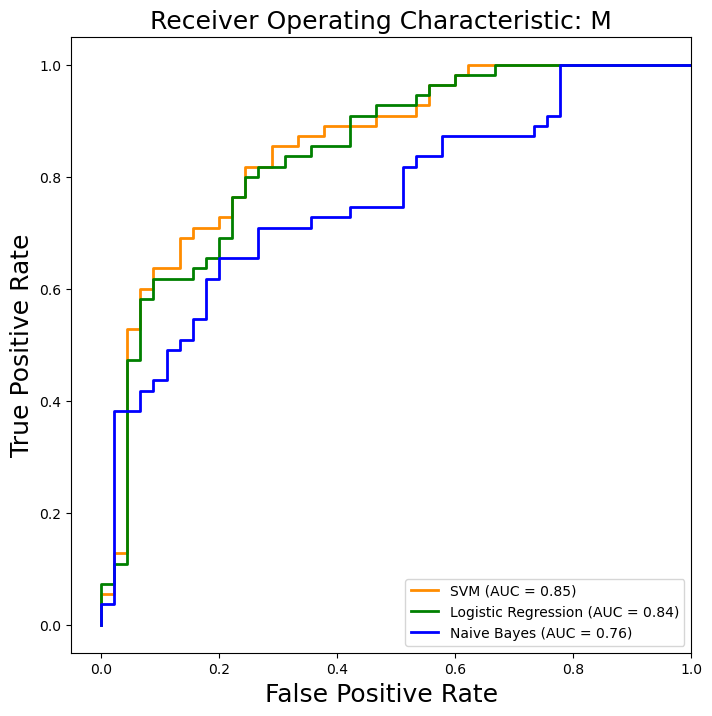

In [12]:
#Best performing model via ROC curve

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, SVCclf.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Naive Bayes (replace 'nb_model' with the actual Naive Bayes model)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curves
plt.figure(figsize=[8, 8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)

# Plot SVM ROC curve
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')

plt.legend(loc="lower right")
plt.show()

In [18]:
# Calculate additional metrics (Precision, Recall, F1 Score) using classification_report

svm_report = classification_report(y_test, svm_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
svm_accuracy = svm_report['accuracy']
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1 = svm_report['weighted avg']['f1-score']

lr_report = classification_report(y_test, lr_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
lr_accuracy = lr_report['accuracy']
lr_precision = lr_report['weighted avg']['precision']
lr_recall = lr_report['weighted avg']['recall']
lr_f1 = lr_report['weighted avg']['f1-score']

nb_report = classification_report(y_test, gnb_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

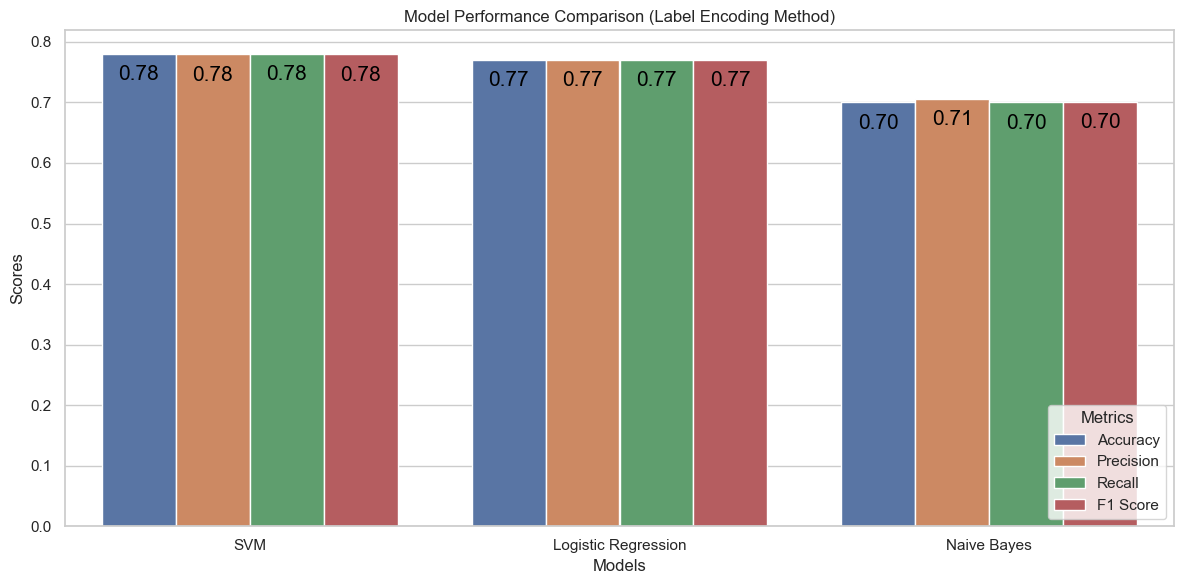

In [21]:
# Create a DataFrame for Seaborn
models = ['SVM', 'Logistic Regression', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

values = [
    [svm_accuracy, svm_precision, svm_recall, svm_f1],
    [lr_accuracy, lr_precision, lr_recall, lr_f1],
    [nb_accuracy, nb_precision, nb_recall, nb_f1]
]

data = pd.DataFrame(values, columns=metrics)
data['Model'] = models

# Melt the DataFrame for easier plotting
melted_data = pd.melt(data, id_vars=['Model'], value_vars=metrics)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="value", hue="variable", data=melted_data)
plt.title('Model Performance Comparison (Label Encoding Method)')
plt.ylabel('Scores')
plt.xlabel('Models')

# Move the legend to the bottom right
plt.legend(title='Metrics', bbox_to_anchor=(1, 0), loc='lower right')

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=15, color='black', xytext=(0, -15), textcoords='offset points')

plt.tight_layout()
plt.show()

# Streamline feature selection
training the model starting from the most relevant features that have the highest correlation with target variable.

In [22]:
df = pd.read_csv('stroke_leundersamplebAFencode.csv')

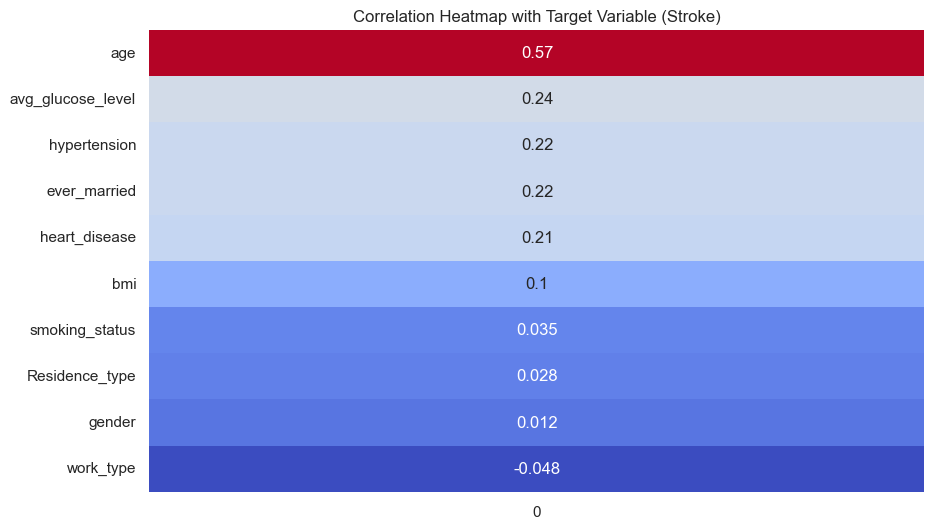

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and target variable
features = df.drop(columns=['stroke'])
target = df['stroke']

# Calculate the correlations
correlations = features.corrwith(target)

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap with Target Variable (Stroke)")
plt.show()

In [66]:
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.571430
avg_glucose_level    0.237278
hypertension         0.219179
ever_married         0.218930
heart_disease        0.209733
bmi                  0.103555
smoking_status       0.035231
Residence_type       0.028157
gender               0.012176
work_type           -0.047991
Name: stroke, dtype: float64

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# define the target variable (dependent variable) as y
y = df['stroke']

# Sort features from highest correlation value to lowest and set as index object for model training
top_features = df.corr()['stroke'].sort_values(ascending=False).index

# Create a new DataFrame containing only the selected features and the target variable
X = df[top_features]

#create training and testing subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Build Model
model = LogisticRegression (random_state = 1, max_iter = 1000)

# Fit Model
model.fit(X_train , y_train)
#model.fit(X_train_scaled , y_train)
#model.fit(X_train_scaled , y_train.ravel())

# Score
model.score(X_test, y_test)
print ('Accuracy score :', model.score(X_test, y_test))

# Predict class labels (not probabilities)
lr_y_pred = model.predict(X_test)

# Calculate and print the confusion matrix
print('Logistic Regression')
print('Model Confusion Matrix (Logistic Regression)')
print(confusion_matrix(y_test, lr_y_pred))

# Print the classification report
print('Model Classification Report (Logistic Regression)')
print(classification_report(y_test, lr_y_pred))

Accuracy score : 1.0
Logistic Regression
Model Confusion Matrix (Logistic Regression)
[[45  0]
 [ 0 55]]
Model Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [26]:
##Regularisation & Scaling to fine-tune model
from sklearn.model_selection import train_test_split, GridSearchCV
#without scaling -pop up issue, i.e. lbfgs solver used by LogisticRegression failed to converge within the specified number of iterations.
#changing solver from lbfgs to liblinear - supports both 'l1' and 'l2' penalties & carry out features Scaling

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

# Create a GridSearchCV instance with logistic regression and parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=lr_params, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Score: 1.0


In [28]:
#Use Support Vector Machine to evaluate model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma = 'auto'))
clf.fit(X_train, y_train)

print('Support Vector Machine')
print('Accuracy:', clf.score(X_test, y_test))
svm_y_pred = clf.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(SVM)')
print(confusion_matrix(y_test, svm_y_pred))

print('Model Classification Report(SVM)')
print(classification_report(y_test, svm_y_pred))

Support Vector Machine
Accuracy: 1.0
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(SVM)
[[45  0]
 [ 0 55]]
Model Classification Report(SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [29]:
#Find best estimator for SVM

from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability=True))]

svc_params = {
    'SVM__C': [1, 10, 100],
    'SVM__gamma': [0.001, 0.0001],
    'SVM__kernel': ['linear', 'rbf']
}

svc_pipeline = Pipeline(steps)
SVCclf = GridSearchCV(svc_pipeline, svc_params)
SVCclf.fit(X, y)

# Get the best estimator and its corresponding score
best_estimator = SVCclf.best_estimator_
best_score = SVCclf.best_score_

print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM',
                 SVC(C=1, gamma=0.001, kernel='linear', probability=True))])
Best Score: 1.0


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Put in best_estimator from previous code
best_model = best_estimator

print('Support Vector Machine_test')

# Calculate and print the accuracy score
accuracy = best_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions on the testing data
svm_y_pred = best_model.predict(X_test)

# Calculate and print the default confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

# Calculate and print the model's confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_pred)
print('Model Confusion Matrix (SVM_C)')
print(conf_matrix)

# Print the model's classification report
print('Model Classification Report (SVM_C)')
print(classification_report(y_test, svm_y_pred))

Support Vector Machine_test
Accuracy: 1.0
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix (SVM_C)
[[45  0]
 [ 0 55]]
Model Classification Report (SVM_C)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [31]:
#Use Baive Bayes to evaluate model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy:', gnb.score(X_test, y_test))
gnb_y_pred = gnb.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(Gaussian)')
print(confusion_matrix(y_test, gnb_y_pred))

print('Model Classification Report(Gaussian)')
print(classification_report(y_test, gnb_y_pred))

Accuracy: 1.0
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(Gaussian)
[[45  0]
 [ 0 55]]
Model Classification Report(Gaussian)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



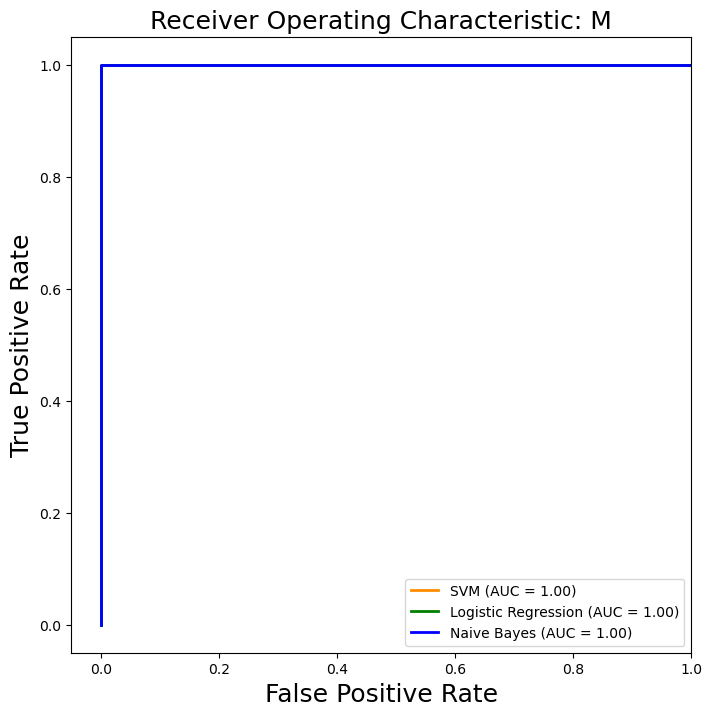

In [44]:
#Best performing model via ROC curve

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, SVCclf.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Naive Bayes (replace 'nb_model' with the actual Naive Bayes model)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curves
plt.figure(figsize=[8, 8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)

# Plot SVM ROC curve
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')

plt.legend(loc="lower right")
plt.show()

In [75]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Compare the two accuracy scores
if test_accuracy > train_accuracy:
    print("Testing accuracy is higher than training accuracy.")
elif test_accuracy < train_accuracy:
    print("Training accuracy is higher than testing accuracy.")
else:
    print("Training and testing accuracy are equal.")

Training Accuracy: 1.00
Testing Accuracy: 1.00
Training and testing accuracy are equal.


Perfect accuracy was obtained from training the model starting from the most relevant features that have the highest correlation with target variable. For a more reliable evaluation, it's recommended to perform cross-validation and possibly hyperparameter tuning to ensure that the model's performance is consistent and not simply a result of chance.

In [32]:
##Checking with Cross-validation

from sklearn.model_selection import cross_val_score

# Assuming X and y are defined
model = LogisticRegression(random_state=1, max_iter=1000)

# Perform cross-validation with, for example, 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [33]:
##Checking with Hyperparameter-tuning

from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

#Use Different Solvers: Try different solvers (e.g., "liblinear", "newton-cg", or "sag") that support L1 regularization want to explore the effect of L1 penalty.

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best CV Score: 1.0


C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chinf\anaconda3\envs\mlus

Given the dataset is relatively small, achieving perfect accuracy could be possible due to limited data. It's essential to evaluate the model on a larger dataset or perform further analysis to ensure robustness.

In [34]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # Try both L1 and L2 penalties
    'solver': ['liblinear', 'saga']  # Both solvers support L1 penalty
}

# Create a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=5000, random_state=1)

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 1.0


Next, I will use different random state to re-evaluating the model's performance. This way, we can observe whether the perfect accuracy persists across multiple data splits or if it varies. 

In [98]:
from sklearn.model_selection import train_test_split

# Loop through different random states
for random_state in range(20):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    model = LogisticRegression(random_state=1, max_iter=1000)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    print(f"Random State: {random_state}, Accuracy: {accuracy}")

Random State: 0, Accuracy: 1.0
Random State: 1, Accuracy: 1.0
Random State: 2, Accuracy: 1.0
Random State: 3, Accuracy: 1.0
Random State: 4, Accuracy: 1.0
Random State: 5, Accuracy: 1.0
Random State: 6, Accuracy: 1.0
Random State: 7, Accuracy: 1.0
Random State: 8, Accuracy: 1.0
Random State: 9, Accuracy: 1.0
Random State: 10, Accuracy: 1.0
Random State: 11, Accuracy: 1.0
Random State: 12, Accuracy: 1.0
Random State: 13, Accuracy: 1.0
Random State: 14, Accuracy: 1.0
Random State: 15, Accuracy: 1.0
Random State: 16, Accuracy: 1.0
Random State: 17, Accuracy: 1.0
Random State: 18, Accuracy: 1.0
Random State: 19, Accuracy: 1.0


In [104]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np

# Define the target variable (dependent variable) as y
y = df['stroke']

# Sort features from highest correlation value to lowest and set as index object for model training
top_features = df.corr()['stroke'].sort_values(ascending=False).index

# Create a new DataFrame containing only the selected features and the target variable
X = df[top_features]

#create training and testing subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize an empty list to store accuracies
accuracies = []

# Loop through different iterations
num_iterations = 20  # You can adjust the number of iterations
for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}")

    # Perform random undersampling
    under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=iteration)
    X_resampled, y_resampled = under_sampler.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=iteration)

    # Train and evaluate your model (use your existing code here)
    model = LogisticRegression(random_state=1, max_iter=1000)
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")
    print("-------------")

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy:.2f}")


Iteration 1
Accuracy: 1.0
-------------
Iteration 2
Accuracy: 1.0
-------------
Iteration 3
Accuracy: 1.0
-------------
Iteration 4
Accuracy: 1.0
-------------
Iteration 5
Accuracy: 1.0
-------------
Iteration 6
Accuracy: 1.0
-------------
Iteration 7
Accuracy: 1.0
-------------
Iteration 8
Accuracy: 1.0
-------------
Iteration 9
Accuracy: 1.0
-------------
Iteration 10
Accuracy: 1.0
-------------
Iteration 11
Accuracy: 1.0
-------------
Iteration 12
Accuracy: 1.0
-------------
Iteration 13
Accuracy: 1.0
-------------
Iteration 14
Accuracy: 1.0
-------------
Iteration 15
Accuracy: 1.0
-------------
Iteration 16
Accuracy: 1.0
-------------
Iteration 17
Accuracy: 1.0
-------------
Iteration 18
Accuracy: 1.0
-------------
Iteration 19
Accuracy: 1.0
-------------
Iteration 20
Accuracy: 1.0
-------------
Average Accuracy: 1.00


In [35]:
# Calculate additional metrics (Precision, Recall, F1 Score) using classification_report

svm_report = classification_report(y_test, svm_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
svm_accuracy = svm_report['accuracy']
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1 = svm_report['weighted avg']['f1-score']

lr_report = classification_report(y_test, lr_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
lr_accuracy = lr_report['accuracy']
lr_precision = lr_report['weighted avg']['precision']
lr_recall = lr_report['weighted avg']['recall']
lr_f1 = lr_report['weighted avg']['f1-score']

nb_report = classification_report(y_test, gnb_y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

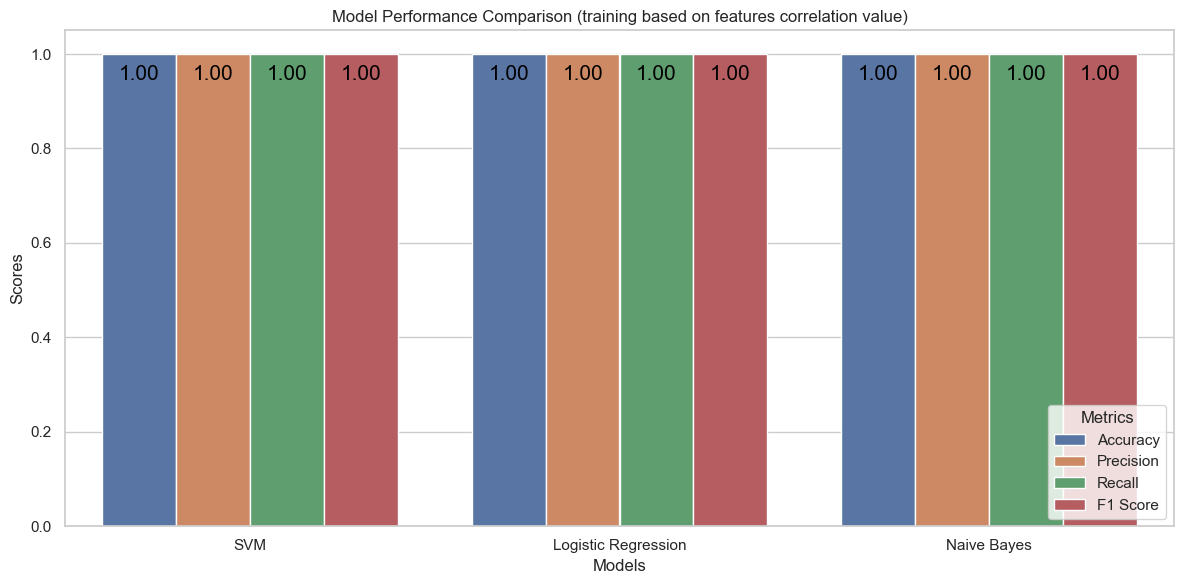

In [37]:
# Create a DataFrame for Seaborn
models = ['SVM', 'Logistic Regression', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

values = [
    [svm_accuracy, svm_precision, svm_recall, svm_f1],
    [lr_accuracy, lr_precision, lr_recall, lr_f1],
    [nb_accuracy, nb_precision, nb_recall, nb_f1]
]

data = pd.DataFrame(values, columns=metrics)
data['Model'] = models

# Melt the DataFrame for easier plotting
melted_data = pd.melt(data, id_vars=['Model'], value_vars=metrics)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="value", hue="variable", data=melted_data)
plt.title('Model Performance Comparison (training based on features correlation value)')
plt.ylabel('Scores')
plt.xlabel('Models')

# Move the legend to the bottom right
plt.legend(title='Metrics', bbox_to_anchor=(1, 0), loc='lower right')

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=15, color='black', xytext=(0, -15), textcoords='offset points')

plt.tight_layout()
plt.show()